In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import json

In [52]:
def objective_function(t):
    X, Y = t
    return 1-1/((1+X**2+Y**2)*(1+np.sin(2*X)**2+1.5*np.sin(2*Y)**2))


optimization_path = []

def objective_function_with_memory(t):
    x, y = t
    z = objective_function(t)
    optimization_path.append((x,y,z))
    return z

t0 = np.array([np.pi/4, np.pi/4])
result = minimize(objective_function_with_memory,
                  t0, method="COBYLA", options={'maxiter': 50})

print(result.fun)
len(optimization_path)

4.4598587933819545e-08


41

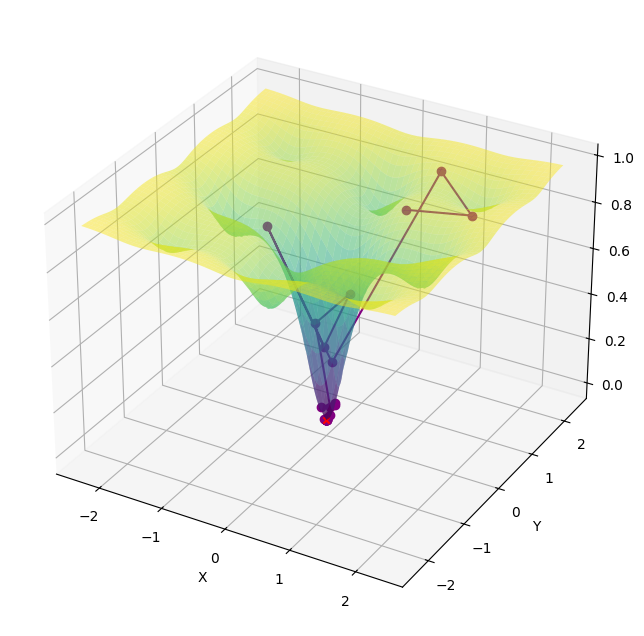

In [49]:
x_vals = np.linspace(-3*np.pi/4, 3*np.pi/4, 200)
y_vals = np.linspace(-3*np.pi/4, 3*np.pi/4, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective_function([X,Y])

fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5) #type: ignore
ax.scatter(result.x[0], result.x[1], result.fun, color='red', marker='x', label='Minimum')


xpath, ypath, zpath = zip(*optimization_path)
ax.plot(xpath, ypath, zpath, color='purple')
ax.scatter(xpath, ypath, zpath, color='purple', marker='o')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z') #type: ignore
plt.show()


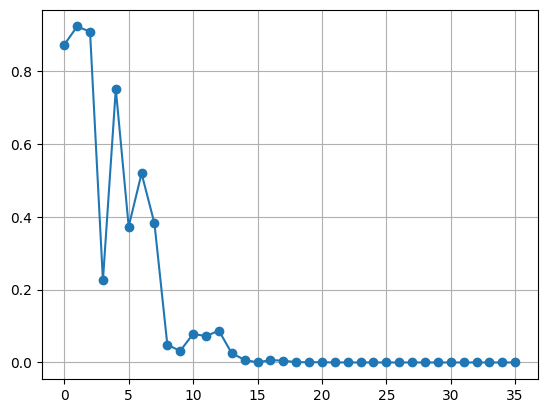

In [47]:
steps = list(range(len(zpath)))
plt.plot(steps, zpath, marker='o', linestyle='-')
plt.grid(True),
plt.show()